In [6]:
!pip install numpy scipy librosa

[]

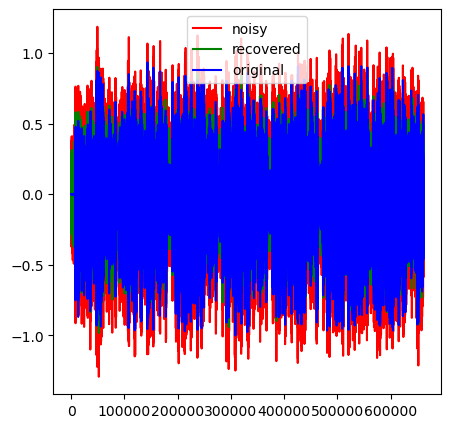

In [43]:
import numpy as np
import librosa
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

# Load the speech file
data, rate = librosa.load('test2.mp3')

data = data / np.max(np.abs(data))  # Normalize
wav.write('speech.wav', rate, (data * 32767).astype(np.int16))


rate, data = wav.read('speech.wav')
data = data / np.max(np.abs(data))  # Normalize
# Add Gaussian noise
mean = 0
snr = 5
std = np.sqrt(np.var(data)*np.power(10,-snr/10))# Adjust the standard deviation as needed
noise = np.random.normal(mean, std, data.shape)
noisy_data = data + noise

# Save the noisy file for reference
wav.write('noisy_speech.wav', rate, (noisy_data * 32767).astype(np.int16))  # Scale back to 16-bit PCM

# Estimating variances
sigma_s2 = np.var(data)  # Variance of the original signal
sigma_n2 = std**2  # Variance of the added noise

# MLE estimation
denoised_data = noisy_data * sigma_s2 / (sigma_s2 + sigma_n2)

# Save the denoised file
wav.write('denoised_speech.wav', rate, (denoised_data * 32767).astype(np.int16))  # Scale back to 16-bit PCM

fig, ax = plt.subplots(figsize=(5, 5)) 

ax.plot(noisy_data,color='r',label='noisy')
ax.plot(denoised_data,color='g',label='recovered')
ax.plot(data,color='b',label='original')
plt.legend()
plt.plot()    


Estimated mean (mu): 0.00022394297712235184
Estimated standard deviation (std): 0.2299589170948207 and 0.04088167482818779


(array([1.19640734e-03, 6.82655950e-03, 1.31839397e-02, 2.14180372e-02,
        3.83788706e-02, 6.74210722e-02, 1.07254399e-01, 1.70804741e-01,
        2.79560514e-01, 4.23105935e-01, 5.68903417e-01, 7.20471805e-01,
        9.40329247e-01, 1.25557085e+00, 1.64494279e+00, 2.13797991e+00,
        1.84457860e+00, 1.54470262e+00, 1.31316262e+00, 1.01715737e+00,
        6.29779438e-01, 3.70417095e-01, 1.98908584e-01, 1.03805931e-01,
        5.19146948e-02, 2.60394538e-02, 1.14245171e-02, 5.13751385e-03,
        2.76815815e-03, 9.61817662e-04]),
 array([-1.        , -0.93555915, -0.8711183 , -0.80667745, -0.7422366 ,
        -0.67779575, -0.6133549 , -0.54891405, -0.4844732 , -0.42003235,
        -0.3555915 , -0.29115065, -0.2267098 , -0.16226895, -0.0978281 ,
        -0.03338725,  0.0310536 ,  0.09549445,  0.1599353 ,  0.22437615,
         0.288817  ,  0.35325785,  0.4176987 ,  0.48213955,  0.5465804 ,
         0.61102125,  0.6754621 ,  0.73990295,  0.8043438 ,  0.86878465,
         0.93322

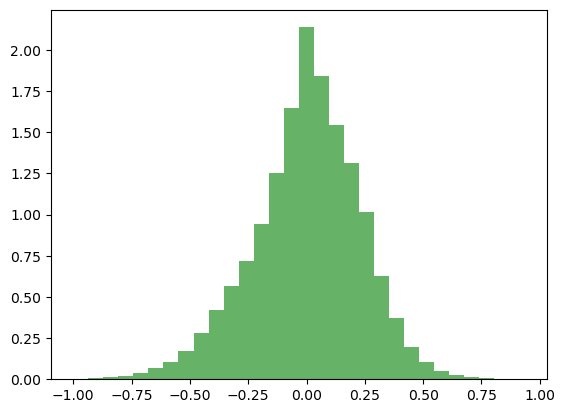

In [42]:
mu, std = norm.fit(data)

print(f'Estimated mean (mu): {mu}')
print(f'Estimated standard deviation (std): {std} and {np.std(noise)}')
plt.hist(data,bins=30, density=True, alpha=0.6, color='g')